In [5]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import tensorflow as tf

In [7]:
import tensorflow_datasets as tfds

# defining the path
dataset= tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/ECG_IMG_all/ECG_Aug')

#splitting data into train and test
ds_trainn=tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/ECG_IMG_all/ECG_Aug',
                                                             validation_split=0.2,
                                                             subset= "training",
                                                             seed=123)

ds_val=tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/ECG_IMG_all/ECG_Aug',
                                                             validation_split=0.2,
                                                             subset= "validation",
                                                             seed=123)

batch_size = 32
size= (224, 224)
ds_train=ds_trainn.map(lambda image, label:(tf.image.resize(image, size), label))
ds_test=ds_val.map(lambda image, label:(tf.image.resize(image, size), label))

Found 4578 files belonging to 4 classes.
Found 4578 files belonging to 4 classes.
Using 3663 files for training.
Found 4578 files belonging to 4 classes.
Using 915 files for validation.


Number of classes: 4
Number of training samples: 115
Number of validation samples: 29


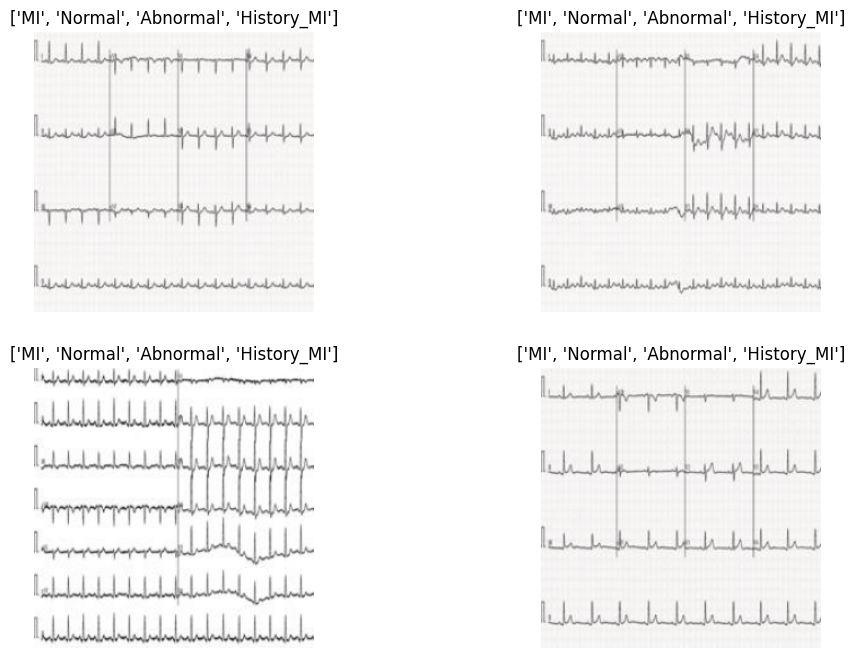

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get information about the dataset
num_classes = 4
num_train_samples = ds_trainn.cardinality().numpy()
num_test_samples = ds_val.cardinality().numpy()
class_names=['MI', 'Normal', 'Abnormal', 'History_MI']

print("Number of classes:", num_classes)
print("Number of training samples:", num_train_samples)
print("Number of validation samples:", num_test_samples)


plt.figure(figsize=(12, 8))
for images, labels in ds_trainn.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names)
        plt.axis("off")
plt.show()

# **2.VGG16**

In [8]:
import tensorflow as tf
from keras import layers, models

# Load the VGG16 model pre-trained on ImageNet
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=15)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(ds_test)
print("Validation Accuracy:", val_acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

In [13]:
import shutil
model.save('/content/trained_model.h5')

# Move the saved model to your Google Drive
shutil.move('/content/trained_model.h5', '/content/gdrive/My Drive/ECG_IMG_all/trained_model.h5')

'/content/gdrive/My Drive/ECG_IMG_all/trained_model.h5'

# **3.ResNet32**

In [ ]:
import tensorflow as tf
from keras import layers, models
from keras.applications import ResNet50

# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the pre-trained ResNet50 as the base
model = models.Sequential()

# Add the ResNet50 base model
model.add(base_model)
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(ds_train, validation_data=ds_test, epochs=15)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(ds_test)
print("Validation Accuracy:", val_acc)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49279108 (187.98 MB)
Trainable params: 25691396 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [ ]:
from transformers import ViTConfig, ViTModel

# Initializing a ViT vit-base-patch16-224 style configuration
configuration = ViTConfig()

# Initializing a model (with random weights) from the vit-base-patch16-224 style configuration
model = ViTModel(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
print(configuration)

ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.40.2"
}



# **ViT (Visual Transformer)**

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from transformers import AutoImageProcessor, ViTForImageClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_folder_path = '/content/gdrive/MyDrive/ECG_IMG_all/ECG_Aug'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class_names = ['MI', 'Normal', 'Abnormal', 'History_MI']

# Load dataset
dataset = datasets.ImageFolder(data_folder_path, transform=transform)
dataset.class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split dataset into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the ViT model and image processor
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Freeze the pre-trained model parameters
for param in model.parameters():
    param.requires_grad = False

# Modify the classification head for the number of classes in the dataset
model.classifier = nn.Linear(model.config.hidden_size, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            loss = criterion(outputs.logits, labels)
            _, predicted = torch.max(outputs.logits, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total

    # Validation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.logits, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_accuracy = correct / total

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/30, Train Loss: 1.2610, Train Accuracy: 0.4495, Test Accuracy: 0.5502
Epoch 2/30, Train Loss: 1.0717, Train Accuracy: 0.5999, Test Accuracy: 0.6048
Epoch 3/30, Train Loss: 0.9760, Train Accuracy: 0.6286, Test Accuracy: 0.6561
Epoch 4/30, Train Loss: 0.9139, Train Accuracy: 0.6764, Test Accuracy: 0.6638
Epoch 5/30, Train Loss: 0.8693, Train Accuracy: 0.6879, Test Accuracy: 0.6921
Epoch 6/30, Train Loss: 0.8337, Train Accuracy: 0.7004, Test Accuracy: 0.7260
Epoch 7/30, Train Loss: 0.8091, Train Accuracy: 0.7168, Test Accuracy: 0.6987
Epoch 8/30, Train Loss: 0.7830, Train Accuracy: 0.7269, Test Accuracy: 0.7369
Epoch 9/30, Train Loss: 0.7636, Train Accuracy: 0.7359, Test Accuracy: 0.7347
Epoch 10/30, Train Loss: 0.7441, Train Accuracy: 0.7419, Test Accuracy: 0.7358
Epoch 11/30, Train Loss: 0.7273, Train Accuracy: 0.7493, Test Accuracy: 0.7424
Epoch 12/30, Train Loss: 0.7116, Train Accuracy: 0.7485, Test Accuracy: 0.7402
Epoch 13/30, Train Loss: 0.6991, Train Accuracy: 0.7553, Test